# Project Name : - Algerian Forest Fire Dataset  we create a logistic reggression  model without hadeling imbalce dataset   .¶

# import some important packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)


In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(246, 14)

In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [9]:
df.iloc[121:125:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [10]:
df.drop([122,123],inplace=True)

In [11]:
df.reset_index(inplace=True)

In [12]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [13]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [14]:
df.head()

,level_0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [15]:
df.columns

Index(['level_0', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
df.columns=df.columns.str.strip()
df.columns

Index(['level_0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df.dropna(inplace=True)

In [18]:
df.head()

,level_0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [19]:
df.dtypes

level_0          int64
day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [20]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [21]:
df.dtypes

level_0         int64
day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [22]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [23]:
df.Classes=df.Classes.str.strip()

In [24]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [25]:
df.columns

Index(['level_0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   level_0      243 non-null    int64 
 1   day          243 non-null    int32 
 2   month        243 non-null    int32 
 3   year         243 non-null    int32 
 4   Temperature  243 non-null    int32 
 5   RH           243 non-null    int32 
 6   Ws           243 non-null    int32 
 7   Rain         243 non-null    object
 8   FFMC         243 non-null    object
 9   DMC          243 non-null    object
 10  DC           243 non-null    object
 11  ISI          243 non-null    object
 12  BUI          243 non-null    object
 13  FWI          243 non-null    object
 14  Classes      243 non-null    object
 15  Region       243 non-null    int32 
dtypes: int32(7), int64(1), object(8)
memory usage: 25.6+ KB


In [27]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      243 non-null    int64  
 1   day          243 non-null    int32  
 2   month        243 non-null    int32  
 3   year         243 non-null    int32  
 4   Temperature  243 non-null    int32  
 5   RH           243 non-null    int32  
 6   Ws           243 non-null    int32  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int32  
dtypes: float64(7), int32(7), int64(1), object(1)
memory usage: 25.6+ KB


In [29]:
df.head()

,level_0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [30]:
df_new = df.drop(['year'],axis=1)

In [31]:
df_new

,level_0,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [32]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,243.0,121.320988,70.671074,0.0,60.50,121.0,182.50,243.0
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [33]:
df_new.head()

,level_0,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
set(df_new.Classes)

{'fire', 'not fire'}

In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [36]:
df_new['Classes'] = label_encoder.fit_transform(df_new['Classes'])

In [37]:
set(df_new.Classes)

{0, 1}

In [38]:
df_new.head()

,level_0,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [39]:
df_new.corr()

,level_0,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
level_0,1.000000,0.125549,0.485839,0.216237,-0.377209,-0.170409,-0.031288,0.227358,0.259345,0.058196,0.281072,0.182059,0.253356,-0.176498,0.865953
day,0.125549,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840,0.000821
month,0.485839,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.024004,0.001857
Temperature,0.216237,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.377209,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,-0.170409,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.031288,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.227358,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.259345,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.058196,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734


<AxesSubplot:>

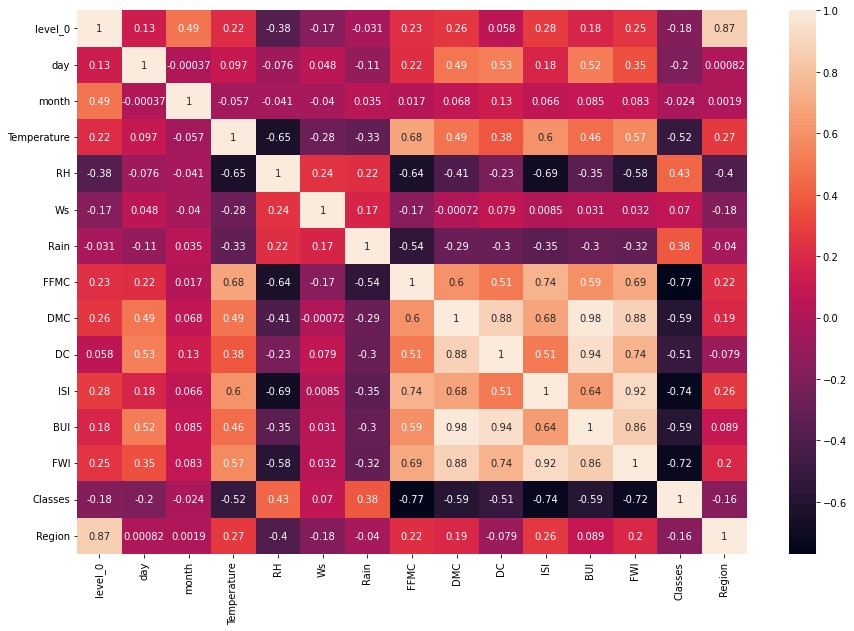

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr() , annot=True)



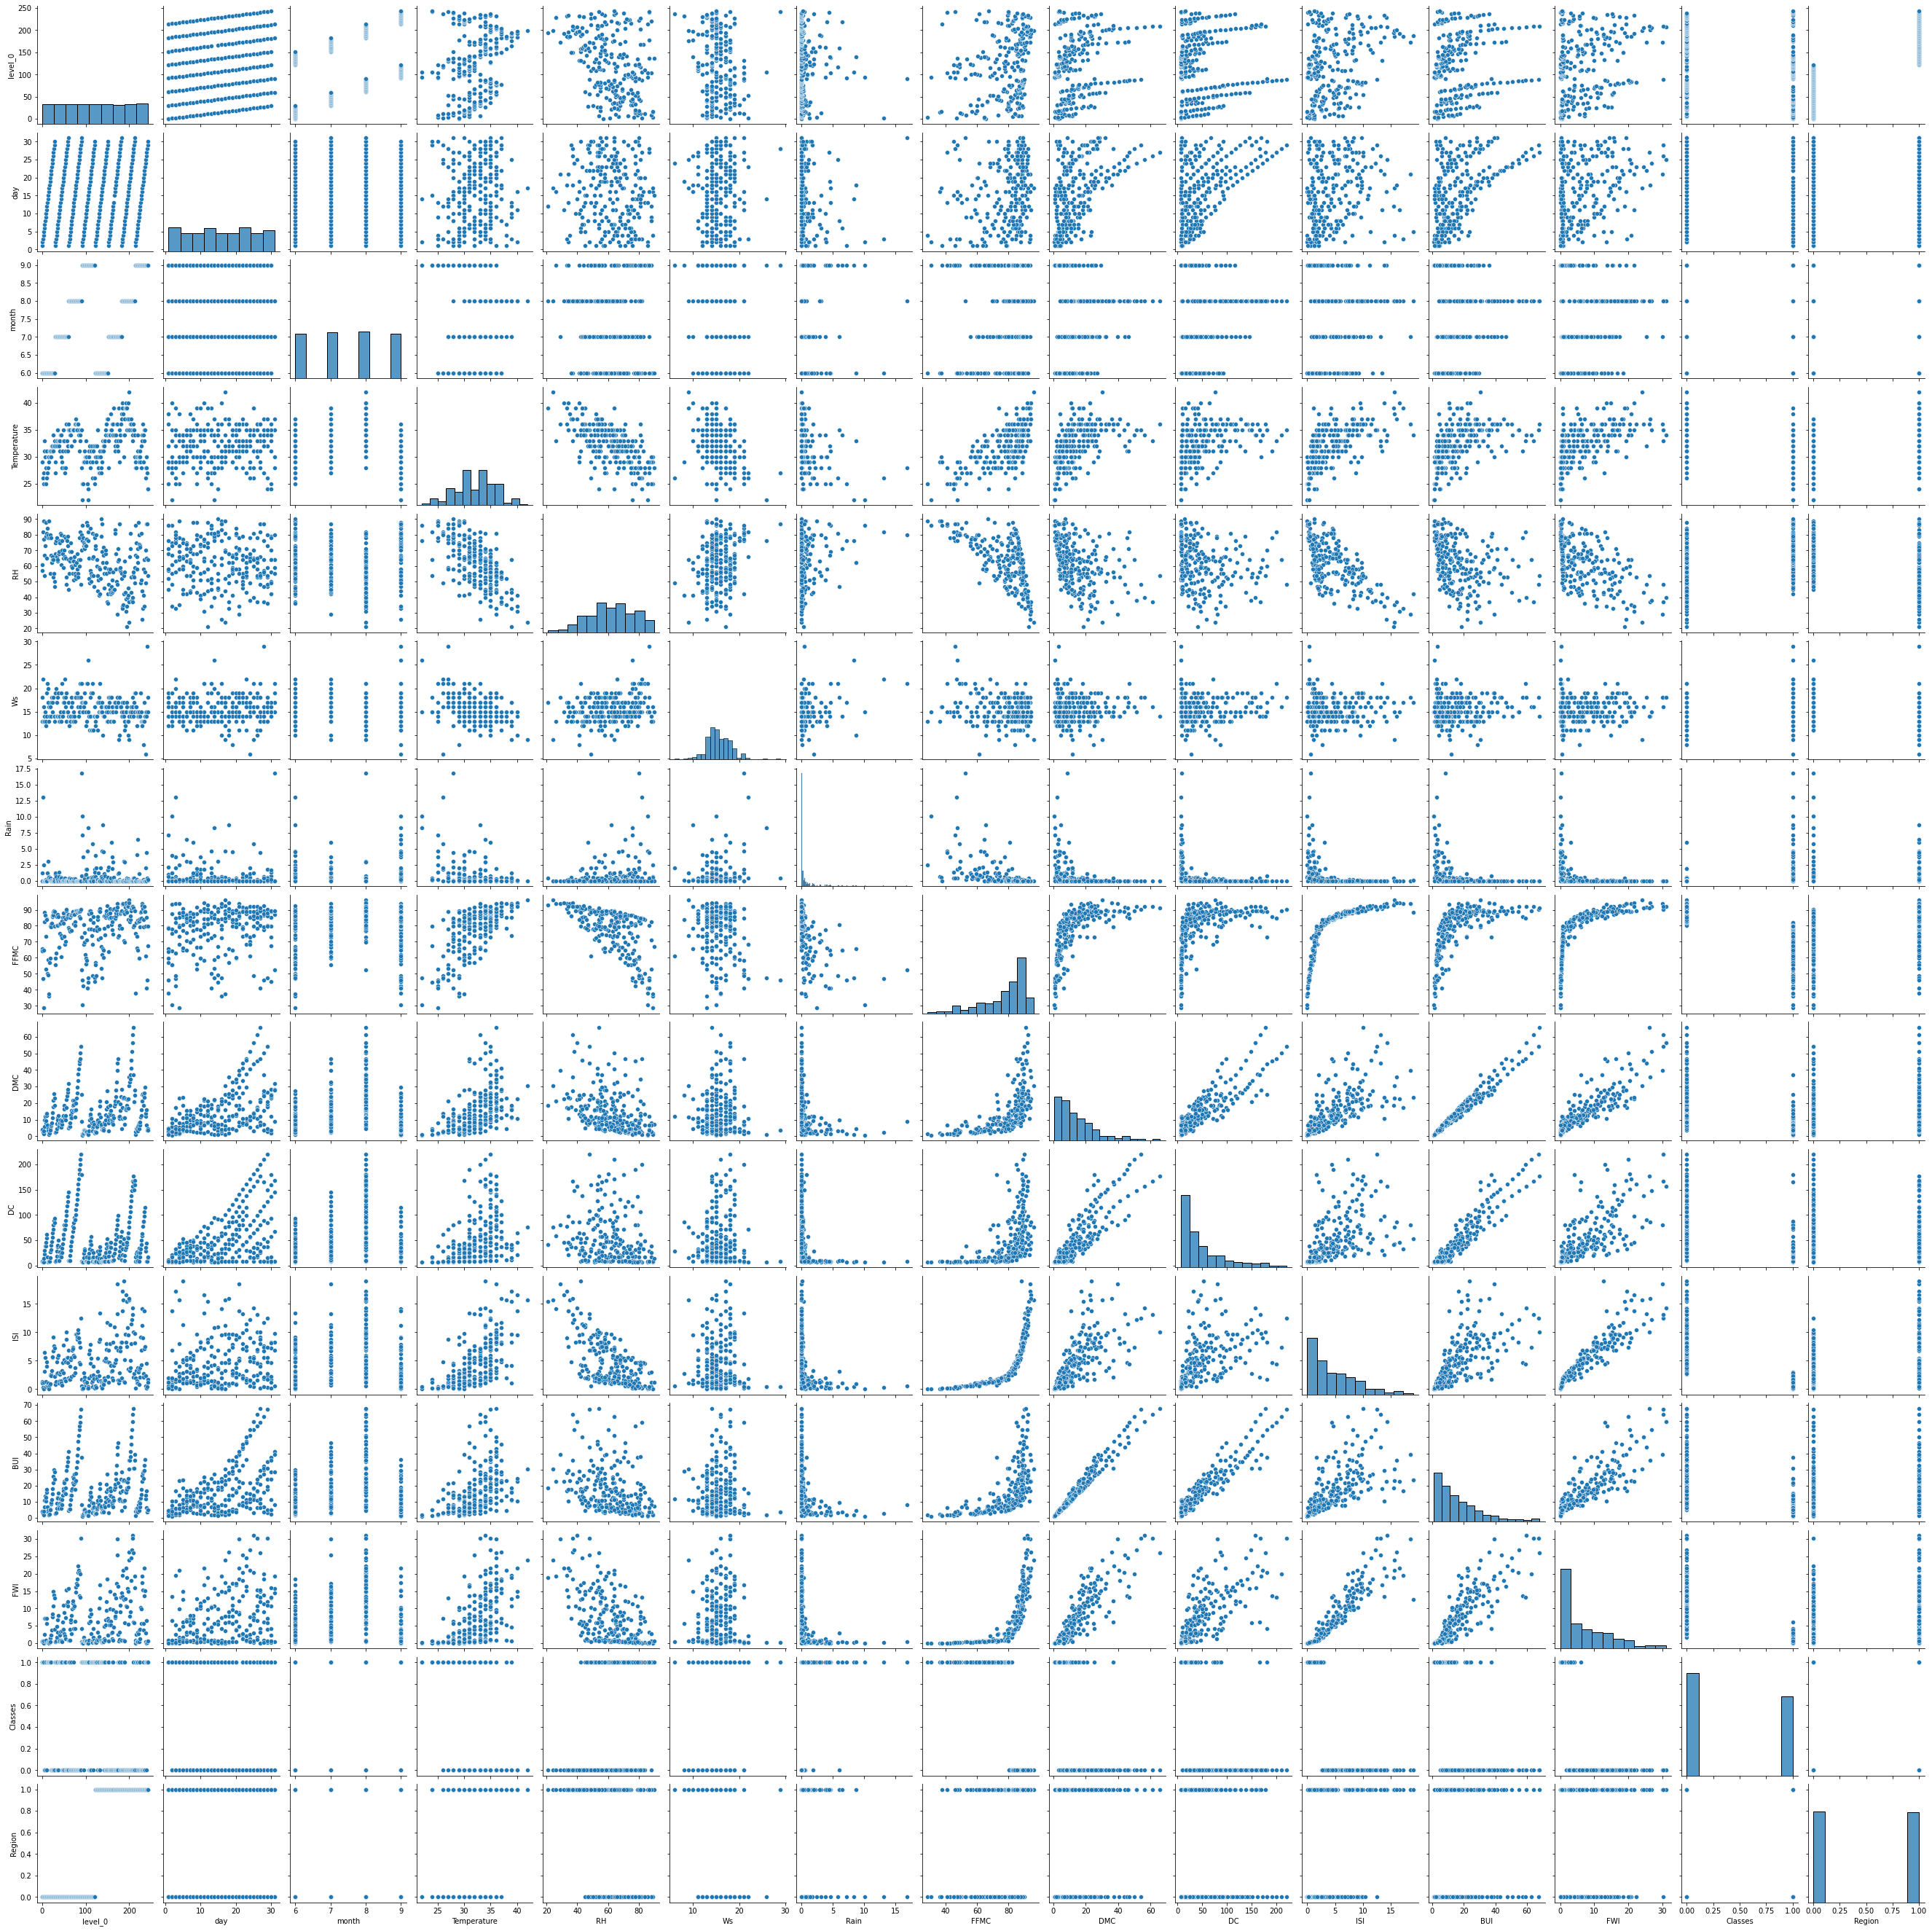

In [41]:
sns.pairplot(df_new)

In [45]:
per = df_new.Classes.value_counts(normalize=True)*100

In [46]:
per

0    56.378601
1    43.621399
Name: Classes, dtype: float64

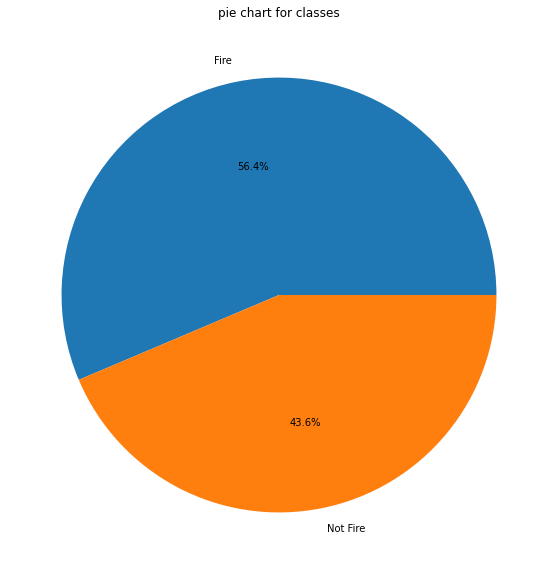

In [70]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(per,labels=classes_labels,autopct="%1.1f%%")
plt.title("pie chart for classes")
plt.show()

In [71]:
df_new

,level_0,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [49]:
X = df_new[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI','Region']]

In [50]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [51]:
y = df_new['Classes']

In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    1
241    1
242    1
243    1
Name: Classes, Length: 243, dtype: int32

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=32,test_size=.33)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
x_train_scaled=scaler.fit_transform(X_train)

In [57]:
x_train_scaled

array([[-0.06542252,  0.35050715, -0.59340378, ..., -0.92395827,
        -0.95798301,  0.97560608],
       [ 0.74984275, -0.00571718,  1.22726691, ...,  1.11195901,
         1.40579446, -1.02500386],
       [-0.6089327 ,  0.77797634, -0.95753792, ..., -1.0216222 ,
        -0.98612321,  0.97560608],
       ...,
       [-1.42419798, -0.29069664,  0.49899863, ...,  0.35318541,
         0.80077999,  0.97560608],
       [ 0.47808766, -0.07696205, -0.95753792, ..., -0.60842865,
        -0.90170259, -1.02500386],
       [-1.15244289,  0.92046608,  0.1348645 , ..., -0.78873129,
        -0.66251082,  0.97560608]])

In [58]:
x_test_scaled=scaler.transform(X_test)

In [59]:
x_test_scaled

array([[ 2.06332569e-01,  1.13420067e+00,  4.98998633e-01,
        -3.90473163e-01,  1.01759360e-01, -8.62070526e-01,
        -6.65053075e-01, -5.49181399e-01, -8.11269120e-01,
        -7.75071654e-01, -1.02500386e+00],
       [-3.37177613e-01, -8.60655571e-01,  1.22726691e+00,
        -1.20684627e-02, -6.57120956e-02, -3.36589182e-01,
        -1.75361334e-01, -6.24876850e-01, -2.70361208e-01,
        -6.20300510e-01, -1.02500386e+00],
       [ 1.02159784e+00, -2.35679775e+00,  8.63132771e-01,
        -3.90473163e-01,  1.10658809e+00,  2.20323732e+00,
         6.62888283e-01,  3.43744568e+00,  1.72799302e+00,
         3.20676777e+00,  9.75606083e-01],
       [-1.96770816e+00,  9.91710941e-01,  4.98998633e-01,
         4.15038324e+00, -2.38118700e+00, -1.15108527e+00,
        -9.00276182e-01, -1.17997682e+00, -1.10426091e+00,
        -1.00019332e+00, -1.02500386e+00],
       [-6.08932704e-01,  1.13420067e+00, -5.93403780e-01,
        -3.90473163e-01,  1.67291669e-01, -7.13184145e-01,
  

In [60]:

from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()


In [61]:
logistic_regression.fit(x_train_scaled,y_train)

LogisticRegression()

In [62]:
print('Intercep is :',logistic_regression.intercept_)

Intercep is : [-1.69998774]


In [63]:
print('Coefficient is :',logistic_regression.coef_)

Coefficient is : [[-0.1914346   0.02785304  0.02704621 -0.21299985 -2.34099273  0.26915864
   0.11560254 -2.323554   -0.26909869 -1.80866713 -0.09778616]]


In [64]:
print("training Score:",logistic_regression.score(x_train_scaled,y_train))

training Score: 0.9814814814814815


In [65]:
print("test score:",logistic_regression.score(x_test_scaled,y_test))

test score: 0.9629629629629629


In [66]:
log_pred = logistic_regression.predict(x_test_scaled)

In [67]:
log_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_pred)

0.9629629629629629

In [73]:
Actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': log_pred})    
Actual_predicted['Report']=abs(Actual_predicted['Actual']-Actual_predicted['Predicted'])
Actual_predicted['Classes']= np.where(Actual_predicted['Report']== 0,'Matched','Unmatched')
Actual_predicted_group_df=Actual_predicted.groupby(['Classes']).agg({'Classes':['count']})
Actual_predicted_group_df.reset_index()

Classes      
             count
0    Matched    78
1  Unmatched     3

In [75]:
conf_mat = confusion_matrix(y_test,log_pred)
conf_mat

array([[41,  2],
       [ 1, 37]], dtype=int64)

In [77]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
true_negative = conf_mat[1][0]
false_negative = conf_mat[1][1]

In [78]:
#Accuracy

In [79]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.5185185185185185

In [80]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9534883720930233

In [81]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.5256410256410257

In [82]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6776859504132232